In [1]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import ultralytics
import os
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import cv2
from IPython.display import Image
from ultralytics import YOLO

ultralytics.checks()


def render(image):
    if image.dtype == np.float64:
        image = cv2.convertScaleAbs(image)
    if len(image.shape) == 3 and image.shape[2] == 3: # BGR or RGB
        if np.array_equal(image[:, :, 0], image[:, :, 2]):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_bytes = cv2.imencode('.png', image)[1].tobytes()
    display(Image(data=img_bytes))
    
    
def run_yolo(yolo, image_url, conf=0.25, iou=0.7):
    results = yolo(image_url, conf=conf, iou=iou)
    res = results[0].plot()[:, :, [2,1,0]]
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    return res

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Setup complete ✅ (8 CPUs, 15.4 GB RAM, 523.9/620.0 GB disk)


In [7]:
test_image = 'datasets/images/train/G0043317.JPG'


image 1/1 /home/m/Desktop/2S/VC/proj/p2/datasets/images/test/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg: 640x640 (no detections), 325.1ms
Speed: 7.3ms preprocess, 325.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


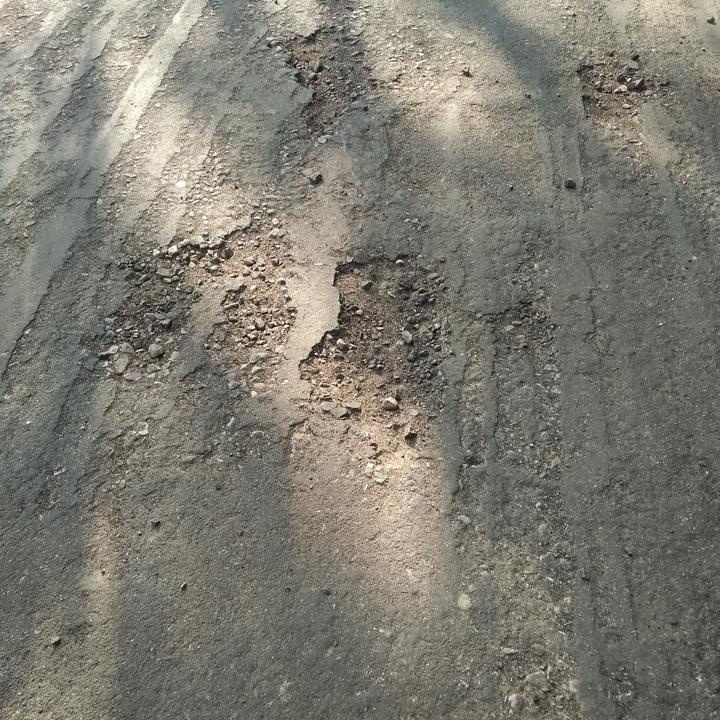

In [2]:
yolo = YOLO('yolov8s.pt')
render(run_yolo(yolo, test_image))

In [3]:
# train the model
yolo.train(data='yolo_config.yaml', epochs=1)

# validate the model
valid_results = yolo.val()

New https://pypi.org/project/ultralytics/8.2.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=yolo_config.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

2024-05-06 17:11:50.271056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 17:11:50.271192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 17:11:50.301449: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /home/m/Desktop/2S/VC/proj/p2/datasets/labels/train.cache... 1265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1265/1265 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/m/Desktop/2S/VC/proj/p2/datasets/images/train/G0052120.JPG: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/m/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
val: Scanning /home/m/Desktop/2S/VC/proj/p2/datasets/labels/valid.cache... 401 images, 0 backgrounds, 0 corrupt: 100%|██████████| 401/401 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      2.446      3.528      1.905          4        640: 100%|██████████| 80/80 [15:59<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:26<00:00,  6.68s/it]


                   all        401       1034        0.4      0.191      0.165     0.0641

1 epochs completed in 0.293 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:13<00:00,  5.64s/it]


                   all        401       1034      0.399      0.191      0.165     0.0645
Speed: 1.6ms preprocess, 161.8ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train3
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/m/Desktop/2S/VC/proj/p2/datasets/labels/valid.cache... 401 images, 0 backgrounds, 0 corrupt: 100%|██████████| 401/401 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:16<00:00,  2.96s/it]


                   all        401       1034        0.4       0.19      0.163      0.064
Speed: 1.7ms preprocess, 169.8ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train32


AttributeError: 'YOLO' object has no attribute 'test'


image 1/1 /home/m/Desktop/2S/VC/proj/p2/datasets/images/train/G0043317.JPG: 480x640 1 car, 238.9ms
Speed: 4.0ms preprocess, 238.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


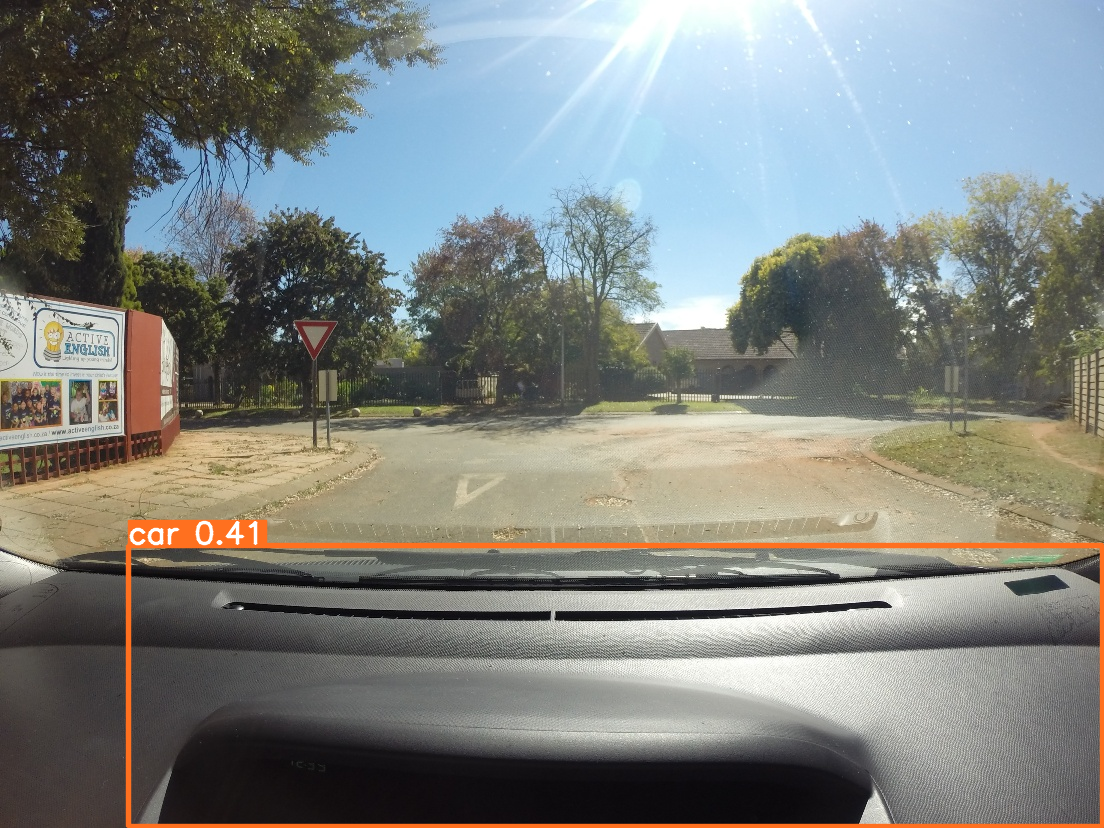

In [10]:
# save the model
# yolo.save('my_best.pt')

# load the model
yolo = YOLO('my_best.pt')

# test the model on an image
render(run_yolo(yolo, test_image))